Prediction - Classification


In [1]:
# Keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, InputLayer, GRU
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import pandas as pd

Using TensorFlow backend.


In [2]:
TRAIN_SIZE = 0.8
EPOCHS = 5
BATCH_SIZE = 64

In [3]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df['target'] = dataset['target']

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df_train, df_test = train_test_split(df, test_size=(1-TRAIN_SIZE), random_state=42)

In [6]:
df_train.shape

(120, 5)

In [7]:
x_train = df_train.drop(columns=['target'])
x_train =((x_train-x_train.min())/(x_train.max()-x_train.min()))*1 #normalization
x_train = x_train.values

x_test = df_test.drop(columns=['target'])
x_test =((x_test-x_test.min())/(x_test.max()-x_test.min()))*1 #normalization
x_test = x_test.values

print("x_train",x_train.shape)
print("x_test",x_test.shape)

y_train = df_train.target.values
y_test = df_test.target.values

#one hot encoding
y_train = to_categorical(df_train.target) 
y_test = to_categorical(df_test.target)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


x_train (120, 4)
x_test (30, 4)
y_train (120, 3)
y_test (30, 3)


In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1:])))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 5,703
Trainable params: 5,703
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=2,
                    callbacks=[ ReduceLROnPlateau(monitor='loss', patience=3, cooldown=0),
                    EarlyStopping(monitor='accuracy', min_delta=1e-4, patience=3)])

Train on 96 samples, validate on 24 samples
Epoch 1/5
 - 0s - loss: 1.0570 - accuracy: 0.3229 - val_loss: 1.0081 - val_accuracy: 0.5833
Epoch 2/5
 - 0s - loss: 1.0509 - accuracy: 0.3333 - val_loss: 0.9956 - val_accuracy: 0.6250
Epoch 3/5
 - 0s - loss: 1.0366 - accuracy: 0.4062 - val_loss: 0.9856 - val_accuracy: 0.6250
Epoch 4/5
 - 0s - loss: 1.0238 - accuracy: 0.4062 - val_loss: 0.9761 - val_accuracy: 0.6250
Epoch 5/5
 - 0s - loss: 1.0219 - accuracy: 0.4792 - val_loss: 0.9655 - val_accuracy: 0.7083
CPU times: user 45 ms, sys: 12.9 ms, total: 57.9 ms
Wall time: 48 ms


In [13]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print(f"Accuracy : {score[1]}")
print(f"Loss : {score[0]}")

30/30 [==============================] - 0s 339us/step
Accuracy : 0.699999988079071
Loss : 0.9777136445045471
CPU times: user 12.4 ms, sys: 4.1 ms, total: 16.5 ms
Wall time: 17.4 ms


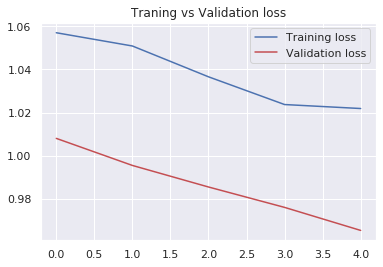

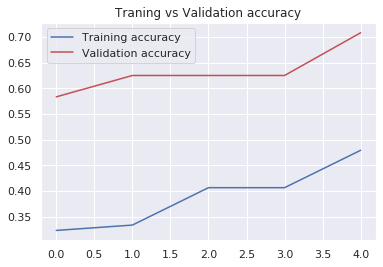

In [14]:
epochs = range(len(history.history['loss']))
 
plt.plot(epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Traning vs Validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Traning vs Validation accuracy')
plt.legend()

plt.show()